# Fuzzy Logic Analysis of Movie Data

## Introduction

In this notebook, we perform a fuzzy logic analysis on a dataset of movies from Netflix. The goal is to evaluate movies based on their IMDb rating, release year, and the number of votes they have received. By employing fuzzy logic principles, we handle the inherent uncertainty and vagueness in classifying movies into categories such as *Low*, *Medium*, or *High* quality. This approach allows for a more nuanced assessment compared to traditional binary classifications.


## Dataset Information

### Objective

The objective of this analysis is to utilize fuzzy logic techniques to classify movies into quality categories based on multiple input attributes. By considering factors such as IMDb rating, release year, and the number of votes, we aim to model the inherently fuzzy concept of "movie quality".

### Attributes

The dataset contains the following attributes:

- **title**: The title of the movie.
- **type**: The type of content (e.g., movie, series).
- **genres**: The genres associated with the movie (e.g., Drama, Comedy).
- **releaseYear**: The year the movie was released.
- **imdbAverageRating**: The average IMDb rating of the movie (scale of 0.0 to 10.0).
- **imdbNumVotes**: The total number of votes the movie has received on IMDb.
- **availableCountries**: The countries where the movie is available on Netflix.

### Dataset Overview

- **Total number of records**: The dataset contains +-4,800 movies after cleaning.
- **Input attributes**: `imdbAverageRating`, `releaseYear`, `imdbNumVotes`.
- **Output attribute**: `movie_quality_score` (calculated using fuzzy logic).



## Methodology

### Data Pre-processing

Before applying the fuzzy logic model, we perform the following data pre-processing steps:

1. **Data Cleaning**: Remove rows with missing values to ensure data integrity.
2. **Feature Selection**: Select relevant features for the analysis (`imdbAverageRating`, `releaseYear`, `imdbNumVotes`).

### Design of Fuzzy Logic Framework

We design a fuzzy logic system with three input variables and one output variable.

#### Input Variables

1. **IMDb Rating** (`imdb_rating`): Represents the average user rating of the movie on IMDb, ranging from 0.0 to 10.0.
2. **Release Year** (`release_year`): The year the movie was released.
3. **Number of Votes** (`num_votes`): Total number of votes the movie has received on IMDb.

#### Output Variable

1. **Movie Quality** (`movie_quality`): The inferred quality of the movie based on the input variables, categorized as *Low*, *Medium*, or *High*.

### Membership Functions Design

#### IMDb Rating

- **Low**: Ratings between 0.0 and 5.0.
- **Medium**: Ratings between 4.0 and 7.0.
- **High**: Ratings between 6.0 and 10.0.

#### Release Year

- **Classic**: Movies released between the earliest year in the dataset and 1990.
- **Modern**: Movies released between 1985 and 2010.
- **Contemporary**: Movies released between 2000 and the latest year in the dataset.

#### Number of Votes

- **Few**: Up to 150,000 votes.
- **Average**: Between 100,000 and 400,000 votes.
- **Many**: 300,000 votes and above.

#### Movie Quality

- **Low**: Quality scores between 0 and 5.
- **Medium**: Quality scores between 4 and 7.
- **High**: Quality scores between 6 and 10.

### Constructing Fuzzy Logic Rules

We construct the following fuzzy logic rules based on domain expertise:

1. **Rule 1**: IF the *IMDb Rating* is *High* AND the *Number of Votes* is *Many*, THEN the *Movie Quality* is *High*.
2. **Rule 2**: IF the *IMDb Rating* is *Medium* AND the *Number of Votes* is *Average*, THEN the *Movie Quality* is *Medium*.
3. **Rule 3**: IF the *IMDb Rating* is *Low* AND the *Number of Votes* is *Few*, THEN the *Movie Quality* is *Low*.
4. **Rule 4**: IF the *IMDb Rating* is *High* AND the *Release Year* is *Classic*, THEN the *Movie Quality* is *High*.
5. **Rule 5**: IF the *IMDb Rating* is *Medium* AND the *Release Year* is *Modern*, THEN the *Movie Quality* is *Medium*.
6. **Rule 6**: IF the *IMDb Rating* is *Low* OR the *Number of Votes* is *Few*, THEN the *Movie Quality* is *Low*.
7. **Rule 7**: IF the *IMDb Rating* is *High*, THEN the *Movie Quality* is *High*.
8. **Rule 8**: IF the *IMDb Rating* is *Medium*, THEN the *Movie Quality* is *Medium*.
9. **Rule 9**: IF the *IMDb Rating* is *Low*, THEN the *Movie Quality* is *Low*.

These rules aim to capture the relationships between the input variables and the perceived movie quality.

## Setup

First, we install and import the necessary libraries.

In [ ]:
!pip install numpy pandas scikit-fuzzy matplotlib requests

### Importing Necessary Libraries

In [22]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

### Import Dataset

Dataset Link: [Full Netflix Movies and TV Shows Dataset](https://www.kaggle.com/datasets/octopusteam/full-netflix-dataset)

> **Note:** Ensure that you have the necessary permissions and API credentials to download the dataset from Kaggle. Place the dataset in the `./data` directory if the automated download does not work.

In [23]:
import requests
import zipfile
from io import BytesIO

# Download and extract the dataset
dataset_url = 'https://www.kaggle.com/api/v1/datasets/download/octopusteam/full-netflix-dataset'

try:
    response = requests.get(dataset_url, allow_redirects=True)
    zipfile.ZipFile(BytesIO(response.content)).extractall('./data')
    print('Dataset downloaded and extracted successfully.')
except Exception as e:
    print(f"Error downloading the dataset: {e}")
    print("Please ensure you have the dataset in the './data' directory.")

Dataset downloaded and extracted successfully.


### Data Pre-processing

In [25]:
# Load the dataset
df = pd.read_csv('./data/data.csv')

# Drop rows with missing values
df_cleaned = df.dropna()

# Drop the 'imdbId' column as it is not needed
df_cleaned = df_cleaned.drop(columns=['imdbId'])

# Save the cleaned data
df_cleaned.to_csv('./data/data-cleaned.csv', index=False)

print('Dataset cleaned and saved to ./data/data-cleaned.csv')

Dataset cleaned and saved to ./data/data-cleaned.csv


## Loading the Dataset

In [26]:
# Load the cleaned dataset
data = pd.read_csv('./data/data-cleaned.csv')

# Display first 30% of the dataset
percentage = 0.3
data[:int(len(data) * percentage)]

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,519248.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1228454.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,212748.0,"AD, AE, AG, AO, BH, BM, BR, BS, BZ, CI, CM, CO..."
3,Unforgiven,movie,"Drama, Western",1992.0,8.2,446602.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,1113480.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."
...,...,...,...,...,...,...,...
5681,Facet (nie)potrzebny od zaraz,movie,"Comedy, Drama, Music",2014.0,4.4,398.0,"AT, BE, BG, BM, CH, CY, CZ, DE, DK, EE, ES, FI..."
5682,The Smile of a Child,movie,"Comedy, Drama, Music",1969.0,4.8,44.0,"AL, AT, BA, BE, BG, CH, CZ, DE, DK, EE, FI, FR..."
5683,Kundo: Age of the Rampant,movie,"Action, Drama",2014.0,6.8,3954.0,KR
5684,The Mummy,movie,"Action, Adventure, Fantasy",2017.0,5.4,211329.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."


## Defining Fuzzy Variables

We define fuzzy variables for the input and output variables.

### Defining the Universes

We determine the ranges (universes) for each variable based on the dataset.

In [27]:
# Determine the data ranges
min_year = data['releaseYear'].min()
max_year = data['releaseYear'].max()
max_votes = data['imdbNumVotes'].max()

print(f"Release Year Range: {min_year} - {max_year}")
print(f"Number of Votes Range: 0 - {max_votes}")

# Define the universal variables
imdb_rating = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'imdb_rating')
release_year = ctrl.Antecedent(np.arange(min_year, max_year + 1, 1), 'release_year')
num_votes = ctrl.Antecedent(np.arange(0, max_votes + 1, 10000), 'num_votes')
movie_quality = ctrl.Consequent(np.arange(0, 11, 1), 'movie_quality')

Release Year Range: 1913.0 - 2024.0
Number of Votes Range: 0 - 2981119.0


### Designing Membership Functions

In [29]:
# IMDb Rating Membership Functions
imdb_rating['low'] = fuzz.trapmf(imdb_rating.universe, [0, 0, 3, 5])
imdb_rating['medium'] = fuzz.trimf(imdb_rating.universe, [4, 5.5, 7])
imdb_rating['high'] = fuzz.trapmf(imdb_rating.universe, [6, 8, 10, 10])

# Release Year Membership Functions
release_year['classic'] = fuzz.trapmf(release_year.universe, [min_year, min_year, 1970, 1990])
release_year['modern'] = fuzz.trapmf(release_year.universe, [1985, 2000, 2010, 2020])
release_year['contemporary'] = fuzz.trapmf(release_year.universe, [2000, 2020, max_year, max_year])

# Number of Votes Membership Functions
num_votes['few'] = fuzz.trapmf(num_votes.universe, [0, 0, 50000, 150000])
num_votes['average'] = fuzz.trimf(num_votes.universe, [100000, 200000, 400000])
num_votes['many'] = fuzz.trapmf(num_votes.universe, [300000, 500000, max_votes, max_votes])

# Movie Quality Membership Functions
movie_quality['low'] = fuzz.trapmf(movie_quality.universe, [0, 0, 3, 5])
movie_quality['medium'] = fuzz.trimf(movie_quality.universe, [4, 5.5, 7])
movie_quality['high'] = fuzz.trapmf(movie_quality.universe, [6, 8, 10, 10])

### Visualizing Membership Functions

C:\Users\ireddragonicy\AppData\Roaming\Python\Python312\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


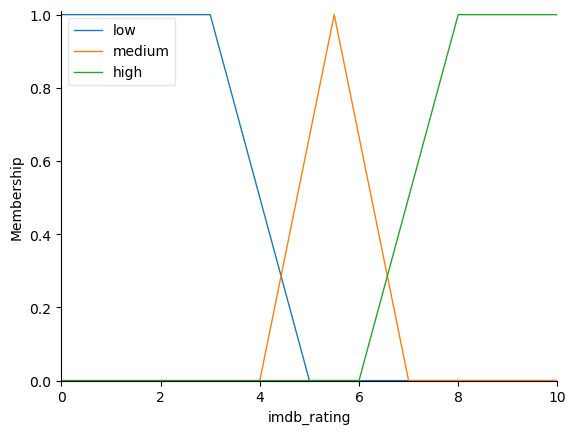

In [30]:
# Visualize IMDb Rating Membership Functions
imdb_rating.view()
plt.show()

C:\Users\ireddragonicy\AppData\Roaming\Python\Python312\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


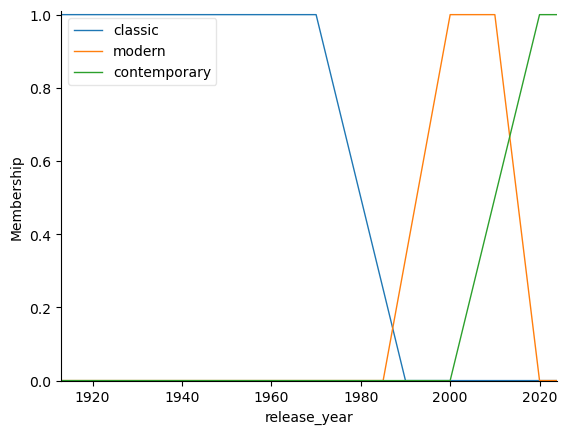

In [31]:
# Visualize Release Year Membership Functions
release_year.view()
plt.show()

C:\Users\ireddragonicy\AppData\Roaming\Python\Python312\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


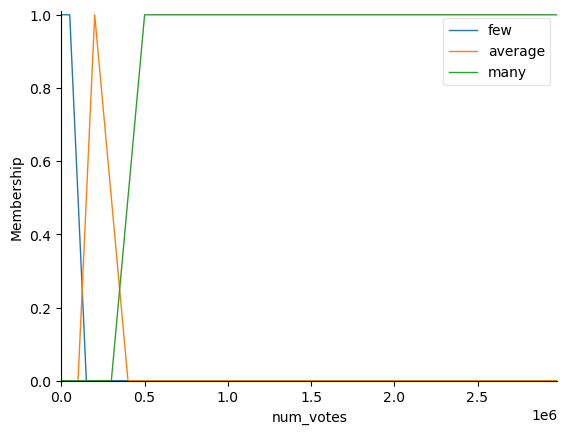

In [32]:
# Visualize Number of Votes Membership Functions
num_votes.view()
plt.show()

C:\Users\ireddragonicy\AppData\Roaming\Python\Python312\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


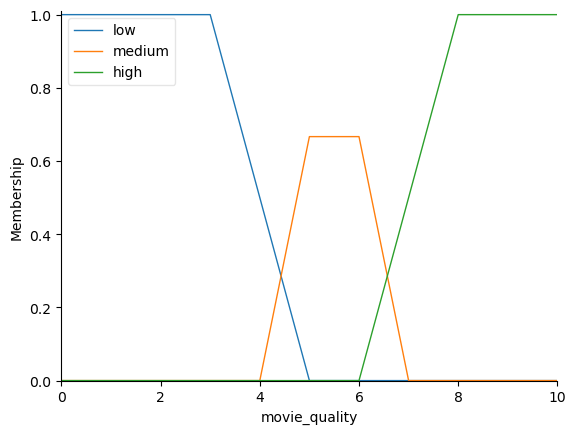

In [33]:
# Visualize Movie Quality Membership Functions
movie_quality.view()
plt.show()

## Constructing Fuzzy Logic Rules

We implement the fuzzy logic rules as defined in the methodology.

In [34]:
# Rule definitions
rule1 = ctrl.Rule(imdb_rating['high'] & num_votes['many'], movie_quality['high'])
rule2 = ctrl.Rule(imdb_rating['medium'] & num_votes['average'], movie_quality['medium'])
rule3 = ctrl.Rule(imdb_rating['low'] & num_votes['few'], movie_quality['low'])
rule4 = ctrl.Rule(imdb_rating['high'] & release_year['classic'], movie_quality['high'])
rule5 = ctrl.Rule(imdb_rating['medium'] & release_year['modern'], movie_quality['medium'])
rule6 = ctrl.Rule(imdb_rating['low'] | num_votes['few'], movie_quality['low'])
rule7 = ctrl.Rule(imdb_rating['high'], movie_quality['high'])
rule8 = ctrl.Rule(imdb_rating['medium'], movie_quality['medium'])
rule9 = ctrl.Rule(imdb_rating['low'], movie_quality['low'])

## Building the Control System

We build the fuzzy control system by adding all the rules.

In [93]:
# Build the control system with all the rules
movie_quality_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9
])

# Note: We will create new simulation instances for each computation to avoid state issues.

## Applying the Fuzzy Model to the Dataset

We apply the fuzzy logic model to each movie in the dataset and compute its quality score. The function `compute_movie_quality` is defined to handle the computation for each row.

In [95]:
# Function to compute movie quality
def compute_movie_quality(row):
    # Create a new simulation instance for each row
    movie_quality_simulation = ctrl.ControlSystemSimulation(movie_quality_ctrl)

    # Initialize variables
    imdb_rating_value = None
    release_year_value = None
    num_votes_value = None

    try:
        # Set input values
        imdb_rating_value = row['imdbAverageRating']
        release_year_value = row['releaseYear']
        num_votes_value = row['imdbNumVotes']

        # Clip inputs to universes
        imdb_rating_value = np.clip(imdb_rating_value, imdb_rating.universe[0], imdb_rating.universe[-1])
        release_year_value = np.clip(release_year_value, release_year.universe[0], release_year.universe[-1])
        num_votes_value = np.clip(num_votes_value, num_votes.universe[0], num_votes.universe[-1])

        # Set inputs
        movie_quality_simulation.input['imdb_rating'] = imdb_rating_value
        movie_quality_simulation.input['release_year'] = release_year_value
        movie_quality_simulation.input['num_votes'] = num_votes_value

        # Compute the fuzzy result
        movie_quality_simulation.compute()

        return movie_quality_simulation.output['movie_quality']

    except Exception as ex:
        print(f"Error computing for row {row.name}: {ex}")
        print(f"Inputs: imdb_rating={imdb_rating_value}, release_year={release_year_value}, num_votes={num_votes_value}")
        return np.nan

# Apply the fuzzy logic model to the dataset
data['movie_quality_score'] = data.apply(compute_movie_quality, axis=1)

## Results

### Adding the Classification Results to the Dataset

We have added a new column `movie_quality_score` to the dataset, which contains the computed quality score for each movie.

In [96]:
# Display the updated dataset with the new column
data.head()

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries,movie_quality_score
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,519248.0,"AT, CH, DE",8.366667
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1228454.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ...",8.444444
2,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,212748.0,"AD, AE, AG, AO, BH, BM, BR, BS, BZ, CI, CM, CO...",8.238095
3,Unforgiven,movie,"Drama, Western",1992.0,8.2,446602.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO...",8.444444
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,1113480.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG...",8.444444


### Classification of Movies

We classify movies into quality categories based on the `movie_quality_score`.

In [97]:
# Define a function to classify the movies
def classify_movie(score):
    if score >= 6.0:
        return 'High'
    elif score >= 4.0:
        return 'Medium'
    else:
        return 'Low'

# Apply the classification
data['movie_quality_category'] = data['movie_quality_score'].apply(classify_movie)

### Displaying Movies with Highest Quality Scores

In [56]:
# Display the top 10 movies with the highest quality scores
top_movies = data.sort_values(by='movie_quality_score', ascending=False)
top_movies[['title', 'imdbAverageRating', 'releaseYear', 'imdbNumVotes', 'movie_quality_score', 'movie_quality_category']].head(10)

KeyError: 'movie_quality_score'

### Visualizing the Movie Quality Distribution

In [ ]:
# Plot the distribution of movie quality scores
plt.figure(figsize=(10,6))
plt.hist(data['movie_quality_score'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Quality Scores')
plt.xlabel('Movie Quality Score')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

### Classification Accuracy

Since we are creating the classification ourselves, we can evaluate the distribution of movies across the quality categories.

In [17]:
# Count the number of movies in each category
category_counts = data['movie_quality_category'].value_counts()
print("Movie Quality Category Counts:")
print(category_counts)

# Plot the counts
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Movies in Each Quality Category')
plt.xlabel('Movie Quality Category')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

KeyError: 'movie_quality_category'

## Conclusion

Using fuzzy logic, we have developed a model to evaluate movies based on their IMDb rating, release year, and number of votes. This approach allows us to handle uncertainties and subjective judgments inherent in movie quality assessment. The fuzzy logic system utilizes rules that encapsulate expert knowledge, enabling nuanced classifications of movie quality.

By analyzing the `movie_quality_score` and the assigned categories, we gain insights into the characteristics of movies that are deemed to be of high, medium, or low quality. The visualizations help understand the distribution of movies across different quality levels.

This analysis demonstrates the applicability of fuzzy logic in fields where human-like reasoning and handling of uncertainty are beneficial. The approach can be extended or modified for other datasets and domains where qualitative assessments are required.